In [2]:
import os
import pandas as pd
from audiolib import AudioDataset

In [3]:
# Functions
def boxprint(s):
    """Print string surrounded by lines"""
    l = '-' * len(s)
    print(f'{l}\n{s}\n{l}')

## Fix mislabeled data

In [4]:
def visualise(audio, fmin=32.7, resolution=20):
    spec = audio.to_spectrogram(resolution=resolution, fmin=fmin, cqt=True)
    spec.plot_fft(fmin=fmin, axis_harm=5, figsize=(16, 3))
    audio.play(autoplay=True)

In [5]:
def iterate_sounds(folder, instrument_name, resolution=10, fmin=20, save=True):
    """
    Iterate through the sounds corresponding to an instrument_id
    and indicate whether they are good training data or not
    """
    dataset = AudioDataset(f'../data/raw/nsynth-{folder}')
    data_filter = {}
    
    for instrument in dataset.file_names_nested[instrument_name].keys():
        boxprint(f'Instrument: {instrument}')
        num_files = len(dataset.file_names_nested[instrument_name][instrument])
        for i, file_name in enumerate(dataset.file_names_nested[instrument_name][instrument]):
            if data_filter.get(instrument) is None:
                # Load file
                try:
                    audiofile = dataset.load_file(file_name)
                    print(f'\n- {file_name}', end='\r')
                except Exception as exc:
                    print(exc)
                    continue
                # Plot spectrogram and play audio
                visualise(audiofile.audio, fmin, resolution)

                # User input
                is_last_item = (i == (num_files-1))
                valid_input = False
                while not valid_input:
                    keep = input('Keep instrument?')
                    if keep == '':
                        if not(is_last_item and (data_filter.get(instrument) is None)):
                            valid_input = True
                        else:
                            print('Last item - make a choice')
                    elif keep == 'y':
                        data_filter[instrument] = 1
                        valid_input = True
                    elif keep == 'n':
                        data_filter[instrument] = 0
                        valid_input = True
                
    print('\n\nFinished')
    if save:
        # Create dataframe
        df_filter = pd.Series(data_filter).reset_index()
        df_filter.columns = ['instrument', 'keep']
        # Save
        out_file = f'../data/interim/filters/{folder}/{instrument_name}-filter.csv'
        os.makedirs(os.path.dirname(out_file), exist_ok=True)
        df_filter.to_csv(out_file, header=True, index=False)
        print(f'Saved filter to {out_file}')

### Iterate through the files for each instrument

-------------------------------
Instrument: guitar_acoustic_001
-------------------------------



/home/julian/projects/audiolib/audiolib/spectrogram.py:259: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


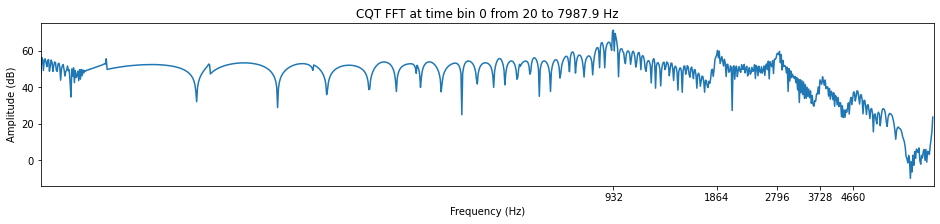

Keep instrument?y
-------------------------------
Instrument: guitar_acoustic_019
-------------------------------



/home/julian/projects/audiolib/audiolib/spectrogram.py:259: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


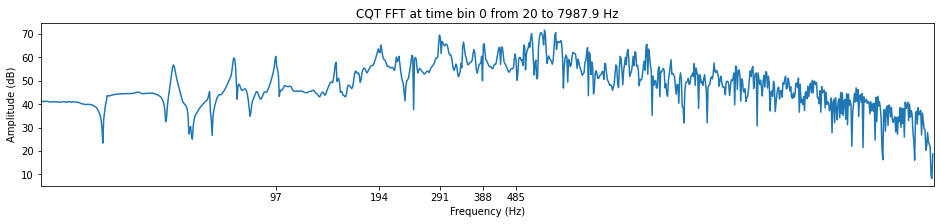

Keep instrument?



/home/julian/projects/audiolib/audiolib/spectrogram.py:259: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


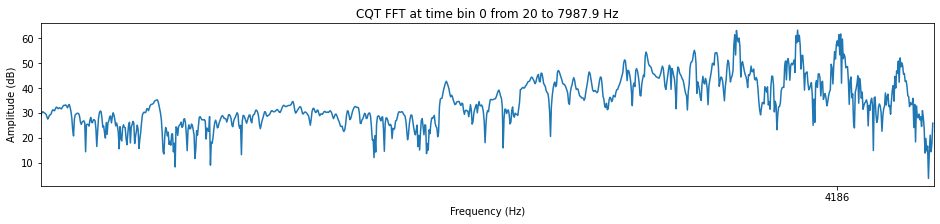

In [ ]:
folder = 'train'
instrument_name = 'guitar_acoustic'
iterate_sounds(folder, instrument_name, resolution=10, save=False)

duplicates:
- flute_acoustic_013-096-075 == flute_acoustic_013-096-100
- vocal_acoustic_015-067-025 == vocal_acoustic_015-067-127

wrong:
- flute_acoustic_034
- reed_acoustic_055
- reed_acoustic_023
- reed_acoustic_011
- brass_acoustic_046